Import librairies

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, Dense , MaxPool2D, Flatten,Dropout

Data preprocessing

In [2]:
train_data = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_set = train_data.flow_from_directory(
    'training_set',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

Found 2195 images belonging to 2 classes.


In [3]:
test_data = image.ImageDataGenerator(rescale=1./255)
test_set = test_data.flow_from_directory(
    'test_set',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

Found 472 images belonging to 2 classes.


Making model

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.compile('adam','binary_crossentropy',['accuracy'])

In [7]:
model.fit(x=train_set,validation_data= test_set,epochs=10)

Epoch 1/10


69/69 [==============================] - 17s 231ms/step - loss: 0.7014 - accuracy: 0.5431 - val_loss: 0.6714 - val_accuracy: 0.5932
Epoch 2/10
69/69 [==============================] - 15s 220ms/step - loss: 0.6636 - accuracy: 0.5909 - val_loss: 0.6406 - val_accuracy: 0.6208
Epoch 3/10
69/69 [==============================] - 15s 220ms/step - loss: 0.6221 - accuracy: 0.6583 - val_loss: 0.6322 - val_accuracy: 0.6377
Epoch 4/10
69/69 [==============================] - 15s 221ms/step - loss: 0.5983 - accuracy: 0.6843 - val_loss: 0.6412 - val_accuracy: 0.6483
Epoch 5/10
69/69 [==============================] - 15s 220ms/step - loss: 0.5916 - accuracy: 0.6893 - val_loss: 0.6058 - val_accuracy: 0.6695
Epoch 6/10
69/69 [==============================] - 15s 221ms/step - loss: 0.5540 - accuracy: 0.7189 - val_loss: 0.5935 - val_accuracy: 0.6992
Epoch 7/10
69/69 [==============================] - 15s 219ms/step - loss: 0.5410 - accuracy: 0.7385 - val_loss: 0.5923 - val_accuracy: 0.69

In [8]:
model.evaluate(test_set)

15/15 [==============================] - 1s 64ms/step - loss: 0.5955 - accuracy: 0.6886


[0.5955247282981873, 0.6885592937469482]

Making predictions

In [17]:
image_path=['predictions/cat1.jpg','predictions/dog1.jpg','predictions/cat2.jpg','predictions/dog2.jpg']
random_image_path = random.choice(image_path)

image_test = image.load_img(random_image_path,target_size=(128,128))
image_array = image.img_to_array(image_test)
image_array = np.expand_dims(image_array,axis=0)

result= model.predict(image_array)
result = result >0.5
if result==0 :
    result = 'cat'
else : 
    result = 'dog'

1/1 [==============================] - 0s 26ms/step


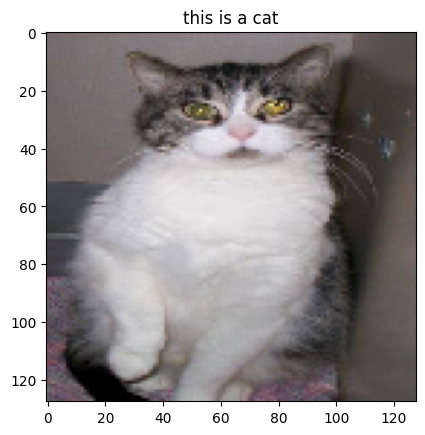

In [18]:
plt.imshow(image_test)
plt.title('this is a '+ result)

plt.show()